# 4. Merging species counts tables into one counts table for all species

In [1]:
import os
import pandas as pd
import numpy as np
# requires dammit env
# source activate dammit
from dammit.fileio.gff3 import GFF3Parser
%matplotlib inline
import pylab as plt
from matplotlib_venn import venn2

In [2]:
counts_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/tximport_counts_evigene/"
counts_matrices = os.listdir(counts_dir)
print(counts_matrices)

['F_chrysotus_counts_evigene.csv', 'F_catanatus_counts_evigene.csv', 'A_xenica_counts_evigene.csv', 'F_heteroclitusMDPL_counts_evigene.csv', 'L_parva_counts_evigene.csv', 'F_heteroclitusMDPP_counts_evigene.csv', 'F_similis_counts_evigene.csv', 'F_diaphanus_counts_evigene.csv', 'F_parvapinis_counts_evigene.csv', 'L_goodei_counts_evigene.csv', 'F_olivaceous_counts_evigene.csv', 'F_rathbuni_counts_evigene.csv', 'F_sciadicus_counts_evigene.csv', 'F_zebrinus_counts_evigene.csv', 'F_grandis_counts_evigene.csv', 'F_notatus_counts_evigene.csv', 'F_notti_counts_evigene.csv']


In [4]:
test = pd.read_csv(counts_dir + 'F_catanatus_counts_evigene.csv',sep="\t")
test = test.rename(columns={'Unnamed: 0': 'Evigene'})

In [5]:
test.head()

,Evigene,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant
0,Funhe2EKm000003,2.000,6.000,13.000,2.000,17.000,13.000,17.000
1,Funhe2EKm000004,211.136,445.152,488.860,281.000,1221.581,562.781,1329.399
2,Funhe2EKm000005,17.358,39.340,29.797,22.421,156.628,102.396,176.913
3,Funhe2EKm000006,21.000,84.000,62.000,31.000,189.000,183.000,256.000
4,Funhe2EKm000007,12.638,9.029,41.158,3.594,50.365,131.408,248.491


24811


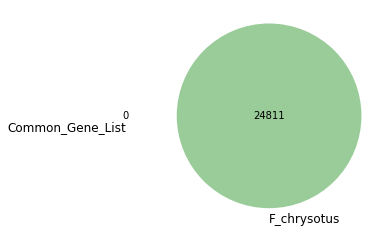

27506


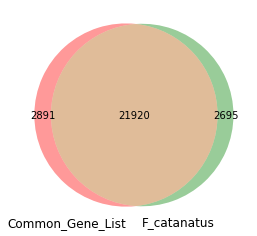

28736


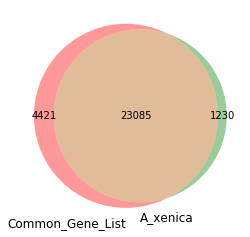

30032


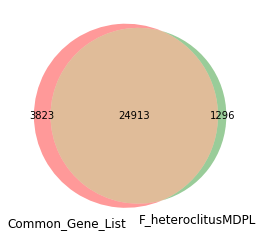

30515


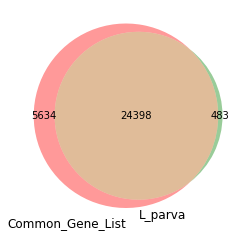

31006


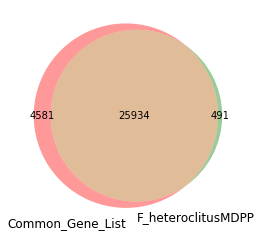

31241


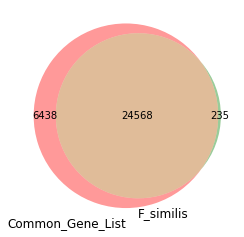

31395


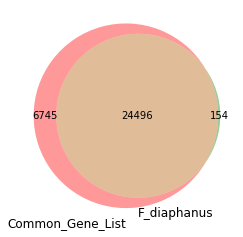

31577


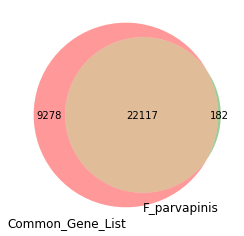

31697


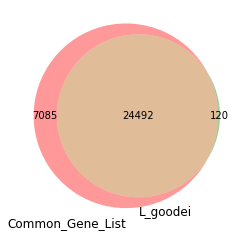

31785


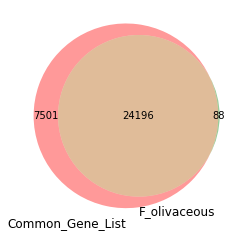

31884


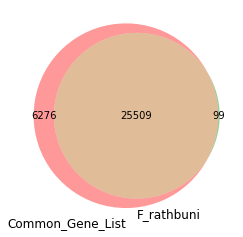

31932


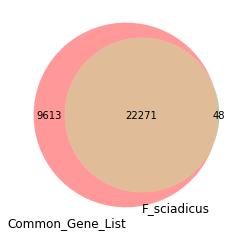

31982


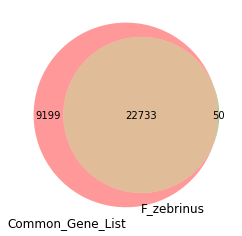

32204


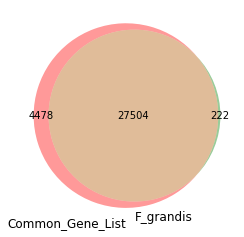

32267


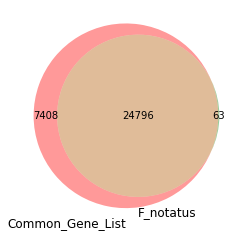

32291


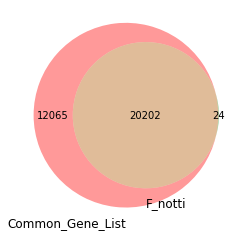

In [6]:
gene_list_common = []
# construct common gene list (union)
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'NCBI'})
        # if countsvalue is >5 in any column, then keep
        table_filt = table[(table.iloc[:,1:] > 5).any(1)]
        species_genes = table['NCBI'].tolist()
        #species_genes = [item for sublist in species_genes for item in sublist]
        a = set(species_genes)
        b = set(gene_list_common)
        gene_list_common = list(a | b)
        print(len(gene_list_common))
        gene_list_common.extend(gene_list_common)
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()
# construct unique gene list ()

In [7]:
print(len(gene_list_common))
print(len(set(gene_list_common)))

64582
32291


24811


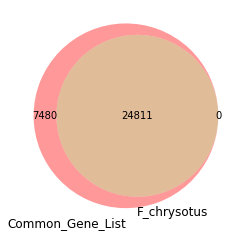

24615


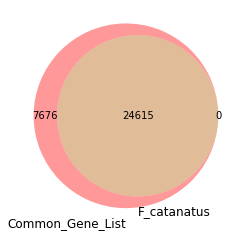

24315


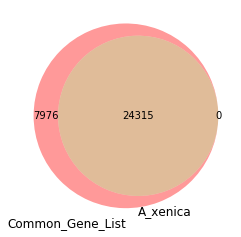

26209


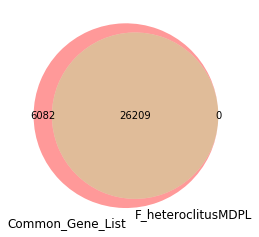

24881


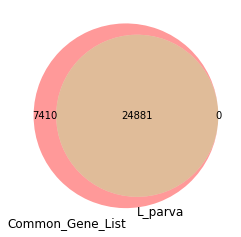

26425


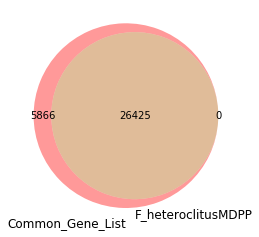

24803


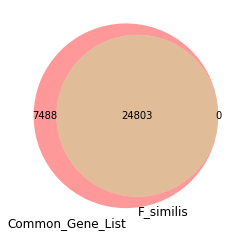

24650


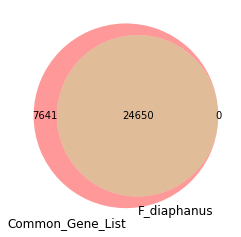

22299


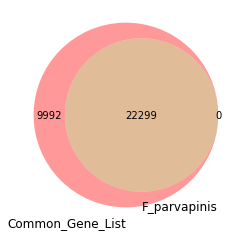

24612


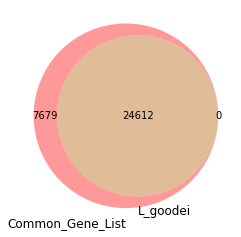

24284


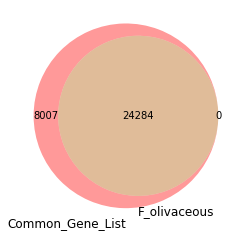

25608


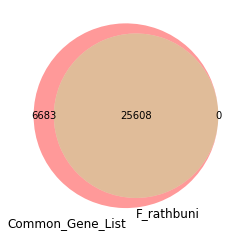

22319


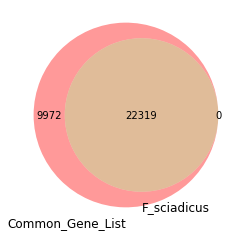

22783


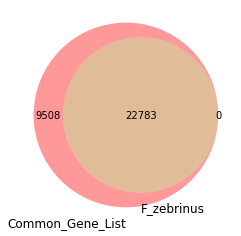

27726


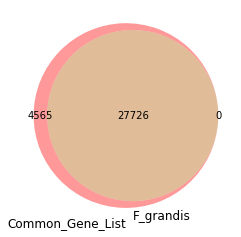

24859


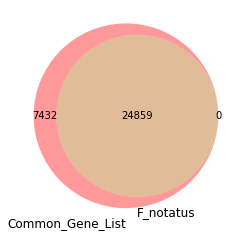

20226


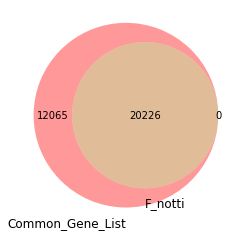

In [8]:
# only genes that are in common across all species
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Evigene'})
        table_filt = table[(table.iloc[:,1:] > 5).any(1)]
        species_genes = table['Evigene'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [9]:
print(counts_matrices)
print(len(counts_matrices))

['F_chrysotus_counts_evigene.csv', 'F_catanatus_counts_evigene.csv', 'A_xenica_counts_evigene.csv', 'F_heteroclitusMDPL_counts_evigene.csv', 'L_parva_counts_evigene.csv', 'F_heteroclitusMDPP_counts_evigene.csv', 'F_similis_counts_evigene.csv', 'F_diaphanus_counts_evigene.csv', 'F_parvapinis_counts_evigene.csv', 'L_goodei_counts_evigene.csv', 'F_olivaceous_counts_evigene.csv', 'F_rathbuni_counts_evigene.csv', 'F_sciadicus_counts_evigene.csv', 'F_zebrinus_counts_evigene.csv', 'F_grandis_counts_evigene.csv', 'F_notatus_counts_evigene.csv', 'F_notti_counts_evigene.csv']
17


In [10]:
count = 0
gene_list_common = []
for genes_file1 in counts_matrices:
    if genes_file1.endswith(".csv"):
        species1 = genes_file1.split("_")[0]+"_"+genes_file1.split("_")[1]
        for genes_file2 in counts_matrices:
            if genes_file2 != genes_file1:
                if genes_file2.endswith(".csv"):
                    species2 = genes_file2.split("_")[0]+"_"+genes_file2.split("_")[1]
                    table1 = pd.read_csv(counts_dir+genes_file1,sep="\t")
                    table1 = table1.rename(columns={'Unnamed: 0': 'Evigene'})
                    table1_filt = table1[(table1.iloc[:,1:] > 5).any(1)]
                    table2 = pd.read_csv(counts_dir+genes_file2,sep="\t")
                    table2 = table2.rename(columns={'Unnamed: 0': 'Evigene'})
                    table2_filt = table2[(table2.iloc[:,1:] > 5).any(1)]
                    species_genes1 = table1_filt['Evigene'].tolist()
                    species_genes2 = table2_filt['Evigene'].tolist()
                    a = set(species_genes1)
                    b = set(species_genes2)
                    genes_list = list(a | b)
                    print(len(genes_list))
                    gene_list_common.extend(genes_list)
#difference=filter(lambda x:x not in list2,list1)

25379
24916
26164
25297
26173
24857
25259
24390
24988
24753
25850
24317
24402
27183
25169
23707
25379
24984
25995
25395
26085
24850
25150
24240
25105
24850
25746
24406
24411
27107
25251
23933
24916
24984
25674
24880
25748
24309
24831
23713
24506
24319
25555
23793
23789
26930
24860
23214
26164
25995
25674
26097
25776
25438
25747
25164
25836
25608
26333
25217
25268
27197
26035
24833
25297
25395
24880
26097
26102
24814
25248
24243
24359
24916
25941
24458
24503
27060
25306
24040
26173
26085
25748
25776
26102
25382
25616
25108
25829
25685
26308
25208
25235
27191
26067
24791
24857
24850
24309
25438
24814
25382
24482
23418
24465
24149
25319
23578
23600
26702
24727
22994
25259
25150
24831
25747
25248
25616
24482
24046
24852
24672
25398
24063
24115
26866
25108
23577
24390
24240
23713
25164
24243
25108
23418
24046
23858
23644
24938
22829
22859
26502
24291
22127
24988
25105
24506
25836
24359
25829
24465
24852
23858
24553
25648
24005
24038
26950
24991
23527
24753
24850
24319
25608
24916
25685
2414

In [11]:
gene_list_common_intersect = gene_list_common
print(len(gene_list_common_intersect))
print(len(set(gene_list_common)))
gene_list_common = list(set(gene_list_common))

6791874
31109


24692


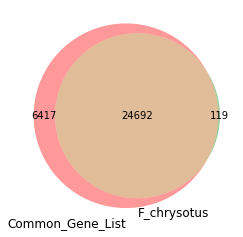

24508


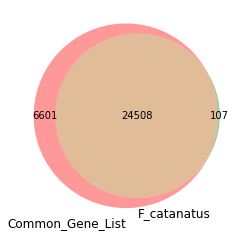

24186


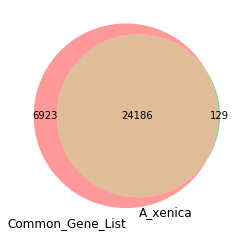

26024


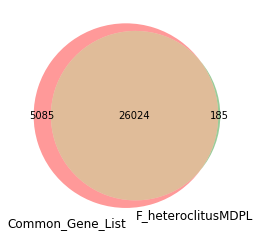

24738


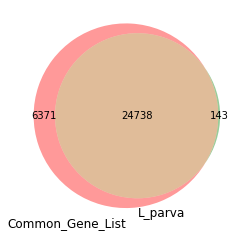

26201


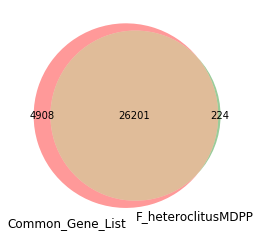

24663


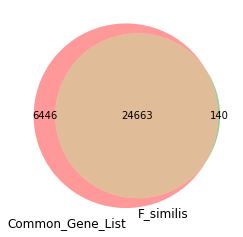

24542


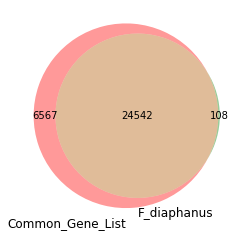

22135


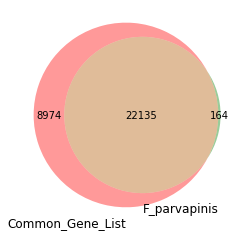

24482


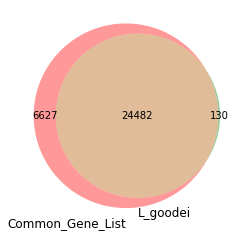

24182


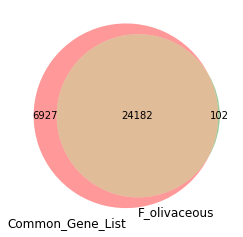

25473


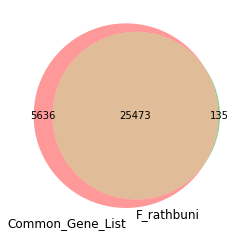

22259


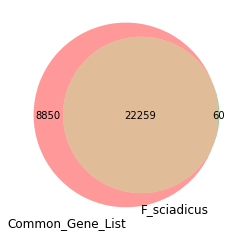

22690


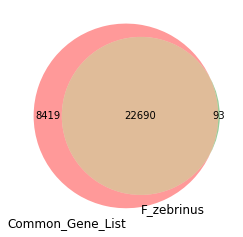

27314


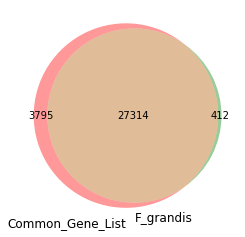

24726


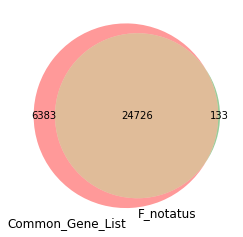

20182


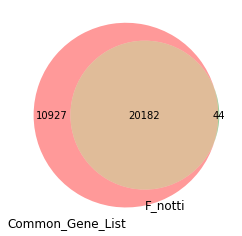

In [13]:
for genes_file in counts_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Evigene'})
        species_genes = table['Evigene'].tolist()
        a = set(species_genes)
        b = set(gene_list_common_intersect)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [16]:
species_counts = pd.DataFrame()
species_counts['Evigene'] = ""  
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        print("========")
        print(species)
        print("========")
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Evigene'})
        counts = table[table['Evigene'].isin(gene_list_common)]
        cols = counts.columns.tolist()
        colnames = ['Evigene']
        for i in cols:
            if i.startswith(species):
                colnames.append(i)
        counts = counts[colnames]
        species_counts = pd.merge(species_counts,counts,on='Evigene',how='outer')
        print(species_counts.shape)

F_chrysotus
(24692, 9)
F_catanatus
(27296, 16)
A_xenica
(28420, 25)
F_heteroclitusMDPL
(29575, 34)
L_parva
(29979, 43)
F_heteroclitusMDPP
(30357, 52)
F_similis
(30524, 61)
F_diaphanus
(30633, 67)
F_parvapinis
(30734, 75)
L_goodei
(30812, 84)
F_olivaceous
(30870, 92)
F_rathbuni
(30931, 101)
F_sciadicus
(30960, 105)
F_zebrinus
(30985, 109)
F_grandis
(31066, 118)
F_notatus
(31097, 127)
F_notti
(31109, 129)


In [17]:
species_counts = species_counts.fillna(0)

In [18]:
species_counts.head()

,Evigene,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,F_catanatus_BW_1.quant,...,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_notti_FW_1.quant,F_notti_FW_2.quant
0,Funhe2EKm000003,2.000,28.000,12.000,5.000,59.000,17.000,1.000,20.000,2.000,...,6.000,14.000,11.000,8.000,19.000,13.000,5.000,6.00,8.908,0.000
1,Funhe2EKm000004,558.781,799.000,844.698,578.000,499.999,915.000,373.000,926.000,211.136,...,249.000,704.000,195.000,354.000,440.000,773.000,344.000,76.00,247.000,208.000
2,Funhe2EKm000005,628.001,2223.001,975.983,908.000,530.001,707.002,432.000,975.000,17.358,...,428.000,1432.000,390.000,578.000,798.000,1703.000,708.000,273.00,526.000,831.000
3,Funhe2EKm000006,137.674,299.533,208.556,177.272,137.623,191.000,94.372,248.538,21.000,...,166.000,313.267,60.248,137.791,119.428,284.143,189.196,148.51,125.000,173.000
4,Funhe2EKm000007,7.747,42.391,0.000,17.547,0.000,0.000,0.000,8.689,12.638,...,8.868,0.000,18.604,0.000,0.000,51.028,26.487,0.00,48.770,80.662


In [19]:
species_counts.shape

(31109, 129)

In [20]:
species_filt = species_counts[(species_counts.iloc[:,1:] > 5).any(1)]

In [21]:
species_filt.shape

(31109, 129)

In [22]:
species_counts.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/Evigene_species_counts.csv",index=False,index_label=None)

# Design rows

In [23]:
cols = species_counts.columns.tolist()

In [24]:
print(cols)

['Evigene', 'F_chrysotus_BW_1.quant', 'F_chrysotus_BW_2.quant', 'F_chrysotus_BW_3.quant', 'F_chrysotus_FW_1.quant', 'F_chrysotus_FW_2.quant', 'F_chrysotus_FW_3.quant', 'F_chrysotus_transfer_1.quant', 'F_chrysotus_transfer_2.quant', 'F_catanatus_BW_1.quant', 'F_catanatus_BW_2.quant', 'F_catanatus_BW_3.quant', 'F_catanatus_FW_1.quant', 'F_catanatus_FW_2.quant', 'F_catanatus_transfer_1.quant', 'F_catanatus_transfer_2.quant', 'A_xenica_BW_1.quant', 'A_xenica_BW_2.quant', 'A_xenica_BW_3.quant', 'A_xenica_FW_1.quant', 'A_xenica_FW_2.quant', 'A_xenica_FW_3.quant', 'A_xenica_transfer_1.quant', 'A_xenica_transfer_2.quant', 'A_xenica_transfer_3.quant', 'F_heteroclitusMDPL_BW_1.quant', 'F_heteroclitusMDPL_BW_2.quant', 'F_heteroclitusMDPL_BW_3.quant', 'F_heteroclitusMDPL_FW_1.quant', 'F_heteroclitusMDPL_FW_2.quant', 'F_heteroclitusMDPL_FW_3.quant', 'F_heteroclitusMDPL_transfer_1.quant', 'F_heteroclitusMDPL_transfer_2.quant', 'F_heteroclitusMDPL_transfer_3.quant', 'L_parva_BW_1.quant', 'L_parva_BW_

In [25]:
clade_design = {"A_xenica":"Clade3","F_catanatus":"Clade1","F_chrysotus":"Clade3",
 "F_diaphanus":"Clade1","F_grandis":"Clade1","F_heteroclitusMDPL":"Clade1",
 "F_heteroclitusMDPP":"Clade1","F_notatus":"Clade3","F_notti":"Clade3",
 "F_olivaceous":"Clade3","F_parvapinis":"Clade2","F_rathbuni":"Clade1",
 "F_sciadicus":"Clade3","F_similis":"Clade1","F_zebrinus":"Clade3",
 "L_goodei":"Clade2","L_parva":"Clade2"}
combined_design = {"A_xenica":"M_Clade3","F_catanatus":"FW_Clade1","F_chrysotus":"BW_Clade3",
 "F_diaphanus":"BW_Clade1","F_grandis":"M_Clade1","F_heteroclitusMDPL":"M_Clade1",
 "F_heteroclitusMDPP":"M_Clade1","F_notatus":"FW_Clade3","F_notti":"FW_Clade3",
 "F_olivaceous":"FW_Clade3","F_parvapinis":"BW_Clade2","F_rathbuni":"FW_Clade1",
 "F_sciadicus":"FW_Clade3","F_similis":"M_Clade1","F_zebrinus":"M_Clade3",
 "L_goodei":"FW_Clade2","L_parva":"M_Clade2"}
phys_design = {"A_xenica":"M","F_catanatus":"FW","F_chrysotus":"BW",
 "F_diaphanus":"BW","F_grandis":"M","F_heteroclitusMDPL":"M",
 "F_heteroclitusMDPP":"M","F_notatus":"FW","F_notti":"FW",
 "F_olivaceous":"FW","F_parvapinis":"BW","F_rathbuni":"FW",
 "F_sciadicus":"FW","F_similis":"M","F_zebrinus":"M",
 "L_goodei":"FW","L_parva":"M"}

In [26]:
species_list = ['Empty']
physiology_list = ['Empty']
clade_list = ['Empty']
combined_list = ['Empty']
condition_list = ['Empty']
for col in cols:
    if col != "Evigene":
        species = col.split("_")[0]+"_"+col.split("_")[1]
        condition = col.split("_")[2]
        if condition == "BW":
            condition = "15_ppt"
        if condition == "FW":
            condition = "0.2_ppt"
        condition_list.append(condition)
        species_list.append(species)
        physiology = phys_design[species]
        physiology_list.append(physiology)
        clade = clade_design[species]
        clade_list.append(clade)
        design = combined_design[species]
        combined_list.append(design)
print(len(species_list))
print(len(physiology_list))
print(len(clade_list))
print(len(combined_list))
print(len(condition_list))

129
129
129
129
129


In [27]:
species_counts.columns

Index(['Evigene', 'F_chrysotus_BW_1.quant', 'F_chrysotus_BW_2.quant',
       'F_chrysotus_BW_3.quant', 'F_chrysotus_FW_1.quant',
       'F_chrysotus_FW_2.quant', 'F_chrysotus_FW_3.quant',
       'F_chrysotus_transfer_1.quant', 'F_chrysotus_transfer_2.quant',
       'F_catanatus_BW_1.quant',
       ...
       'F_notatus_BW_2.quant', 'F_notatus_BW_3.quant', 'F_notatus_FW_1.quant',
       'F_notatus_FW_2.quant', 'F_notatus_FW_3.quant',
       'F_notatus_transfer_1.quant', 'F_notatus_transfer_2.quant',
       'F_notatus_transfer_3.quant', 'F_notti_FW_1.quant',
       'F_notti_FW_2.quant'],
      dtype='object', length=129)

In [28]:
species_counts.shape

(31109, 129)

In [29]:
df = pd.DataFrame([species_list],columns=species_counts.columns)
df2 = pd.DataFrame([physiology_list],columns=species_counts.columns)
df3 = pd.DataFrame([clade_list],columns=species_counts.columns)
df4 = pd.DataFrame([combined_list],columns=species_counts.columns)
df5 = pd.DataFrame([condition_list],columns=species_counts.columns)
print(df.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
#df.head()
species_counts_real = species_counts.append(df)
species_counts_real = species_counts_real.append(df2)
species_counts_real = species_counts_real.append(df3)
species_counts_real = species_counts_real.append(df4)
species_counts_real = species_counts_real.append(df5)
print(species_counts_real.shape)

(1, 129)
(1, 129)
(1, 129)
(1, 129)
(1, 129)
(31114, 129)


In [30]:
pd.set_option('display.max_columns',500)
species_counts_real.tail(5)

,Evigene,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,A_xenica_FW_1.quant,A_xenica_FW_2.quant,A_xenica_FW_3.quant,A_xenica_transfer_1.quant,A_xenica_transfer_2.quant,A_xenica_transfer_3.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant,L_parva_BW_1.quant,L_parva_BW_2.quant,L_parva_BW_3.quant,L_parva_FW_1.quant,L_parva_FW_2.quant,L_parva_FW_3.quant,L_parva_transfer_1.quant,L_parva_transfer_2.quant,L_parva_transfer_3.quant,F_heteroclitusMDPP_BW_1.quant,F_heteroclitusMDPP_BW_2.quant,F_heteroclitusMDPP_BW_3.quant,F_heteroclitusMDPP_FW_1.quant,F_heteroclitusMDPP_FW_2.quant,F_heteroclitusMDPP_FW_3.quant,F_heteroclitusMDPP_transfer_1.quant,F_heteroclitusMDPP_transfer_2.quant,F_heteroclitusMDPP_transfer_3.quant,F_similis_BW_1.quant,F_similis_BW_2.quant,F_similis_BW_3.quant,F_similis_FW_1.quant,F_similis_FW_2.quant,F_similis_FW_3.quant,F_similis_transfer_1.quant,F_similis_transfer_2.quant,F_similis_transfer_3.quant,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,L_goodei_FW_3.quant,L_goodei_transfer_1.quant,L_goodei_transfer_2.quant,L_goodei_transfer_3.quant,F_olivaceous_BW_1.quant,F_olivaceous_BW_2.quant,F_olivaceous_BW_3.quant,F_olivaceous_FW_1.quant,F_olivaceous_FW_2.quant,F_olivaceous_FW_3.quant,F_olivaceous_transfer_1.quant,F_olivaceous_transfer_2.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,F_zebrinus_BW_1.quant,F_zebrinus_BW_2.quant,F_zebrinus_FW_1.quant,F_zebrinus_FW_2.quant,F_grandis_BW_1.quant,F_grandis_BW_2.quant,F_grandis_BW_3.quant,F_grandis_FW_1.quant,F_grandis_FW_2.quant,F_grandis_FW_3.quant,F_grandis_transfer_1.quant,F_grandis_transfer_2.quant,F_grandis_transfer_3.quant,F_notatus_BW_1.quant,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_notti_FW_1.quant,F_notti_FW_2.quant
0,Empty,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_similis,F_similis,F_similis,F_similis,F_similis,F_similis,F_similis,F_similis,F_similis,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphan

In [31]:
species_counts_real.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/Evigene_species_counts_designfactors.csv")

In [32]:
species_counts_real.shape

(31114, 129)